# 01 KMeans Elbow Method

# Unsupervised Learning: Guida Completa

**Durata**: 5 ore  
**Prerequisiti**: Python base, concetti fondamentali di Machine Learning

---

## Indice

1. [Introduzione all'Unsupervised Learning](#1.-Introduzione-all'Unsupervised-Learning)
2. [Clustering](#2.-Clustering)
   - 2.1 K-Means
   - 2.2 DBSCAN
   - 2.3 Clustering Gerarchico
   - 2.4 Gaussian Mixture Models
3. [Riduzione della Dimensionalita](#3.-Riduzione-della-Dimensionalita)
   - 3.1 PCA
   - 3.2 t-SNE
   - 3.3 UMAP
4. [Anomaly Detection](#4.-Anomaly-Detection)
   - 4.1 Isolation Forest
   - 4.2 Local Outlier Factor
5. [Association Rules](#5.-Association-Rules)
   - 5.1 Apriori
6. [Progetto Finale](#6.-Progetto-Finale)
7. [Conclusioni e Risorse](#7.-Conclusioni-e-Risorse)

---

## 1. Introduzione all'Unsupervised Learning

L'**Unsupervised Learning** (apprendimento non supervisionato) rappresenta una delle branche fondamentali del Machine Learning. A differenza del Supervised Learning, dove disponiamo di etichette che indicano la risposta corretta per ogni esempio, nell'Unsupervised Learning lavoriamo con dati **privi di etichette**.

### 1.1 Differenza con il Supervised Learning

| Caratteristica | Supervised Learning | Unsupervised Learning |
|----------------|--------------------|-----------------------|
| **Etichette** | Presenti | Assenti |
| **Obiettivo** | Predire una variabile target | Scoprire pattern nascosti |
| **Validazione** | Confronto con ground truth | Metriche interne (silhouette, inertia) |
| **Esempi** | Classificazione, Regressione | Clustering, Dimensionality Reduction |

### 1.2 Quando usare l'Unsupervised Learning

L'apprendimento non supervisionato e particolarmente utile quando:

- **Non disponiamo di etichette**: raccogliere etichette puo essere costoso o impossibile
- **Vogliamo esplorare i dati**: scoprire strutture nascoste prima di costruire modelli supervisionati
- **Dobbiamo ridurre la dimensionalita**: preparare i dati per algoritmi successivi
- **Cerchiamo anomalie**: identificare comportamenti insoliti senza esempi di anomalie

### 1.3 Le quattro categorie principali

In questo corso esploreremo:

1. **Clustering**: raggruppare dati simili (K-Means, DBSCAN, Hierarchical, GMM)
2. **Dimensionality Reduction**: ridurre le feature preservando l'informazione (PCA, t-SNE, UMAP)
3. **Anomaly Detection**: identificare outlier (Isolation Forest, LOF)
4. **Association Rules**: scoprire relazioni tra variabili (Apriori, FP-Growth)

### 1.4 Setup dell'ambiente

Installiamo tutte le librerie necessarie per il corso.

In [1]:
# Installazione delle librerie necessarie
!pip install -q numpy pandas matplotlib seaborn scikit-learn umap-learn mlxtend

In [2]:
# Verifica delle versioni installate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")

# Configurazione visualizzazioni
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Seed per riproducibilita
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

NumPy: 2.0.2
Pandas: 2.2.2
Scikit-learn: 1.6.1


---

## 2. Clustering

Il **clustering** e la tecnica di raggruppare oggetti simili in insiemi chiamati **cluster**. Gli oggetti all'interno dello stesso cluster sono piu simili tra loro rispetto a quelli in cluster diversi.

### Metriche di valutazione del clustering

Poiche non abbiamo etichette, valutiamo la qualita del clustering con metriche **interne**:

- **Silhouette Score**: misura quanto un punto e simile al proprio cluster rispetto agli altri. Valore tra -1 e 1, piu alto e meglio.

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

dove $a(i)$ e la distanza media intra-cluster e $b(i)$ e la distanza media al cluster piu vicino.

- **Inertia** (solo K-Means): somma delle distanze quadrate dai punti ai centroidi. Piu basso e meglio.

- **Calinski-Harabasz Index**: rapporto tra dispersione inter-cluster e intra-cluster. Piu alto e meglio.

- **Davies-Bouldin Index**: media della similarita massima tra cluster. Piu basso e meglio.

### 2.1 K-Means Clustering

**K-Means** e l'algoritmo di clustering piu popolare. Partiziona i dati in $K$ cluster, dove ogni punto appartiene al cluster con il centroide piu vicino.

#### Come funziona K-Means

1. **Inizializzazione**: seleziona $K$ centroidi iniziali (casualmente o con k-means++)
2. **Assegnazione**: ogni punto viene assegnato al centroide piu vicino
3. **Aggiornamento**: i centroidi vengono ricalcolati come media dei punti assegnati
4. **Iterazione**: ripeti passi 2-3 fino a convergenza

#### Vantaggi e svantaggi

| Vantaggi | Svantaggi |
|----------|----------|
| Semplice e veloce | Richiede di specificare $K$ |
| Scalabile a grandi dataset | Assume cluster sferici |
| Funziona bene con cluster compatti | Sensibile agli outlier |
| Risultati interpretabili | Sensibile all'inizializzazione |

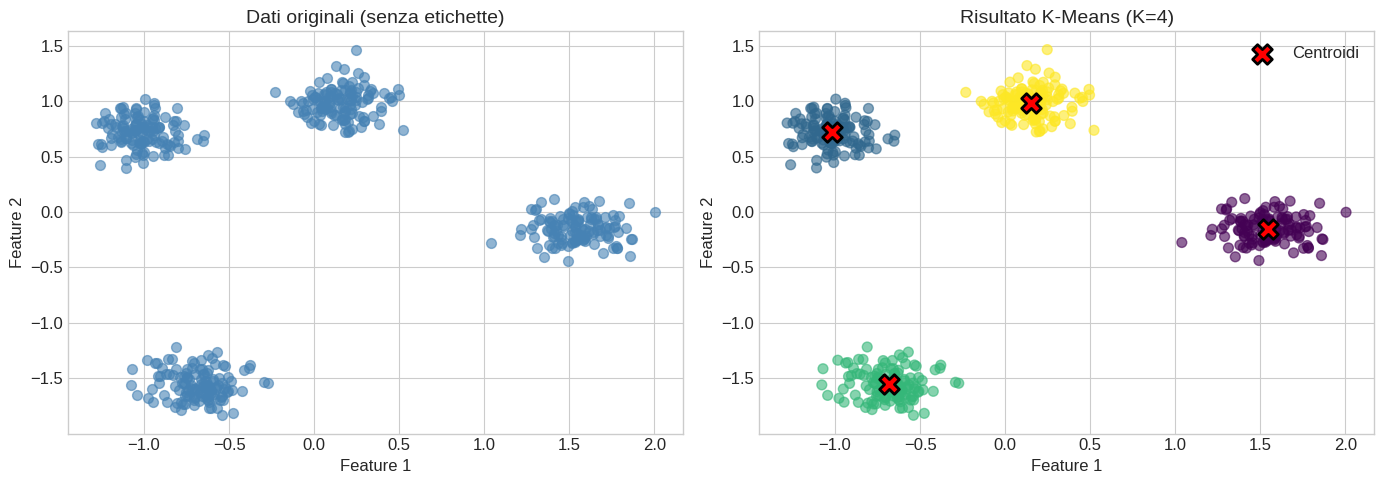

METRICHE DI VALUTAZIONE K-MEANS
Inertia: 18.66
Silhouette Score: 0.839
Calinski-Harabasz Index: 8696.81
Davies-Bouldin Index: 0.225


In [3]:
# SEZIONE 2.1: K-Means Clustering
# Questa sezione e completamente incapsulata

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Generazione dataset sintetico con 4 cluster ben separati
X_kmeans, y_true_kmeans = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=0.8,
    random_state=42
)

# Standardizzazione (best practice per K-Means)
scaler_kmeans = StandardScaler()
X_kmeans_scaled = scaler_kmeans.fit_transform(X_kmeans)

# Visualizzazione dati originali
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_kmeans_scaled[:, 0], X_kmeans_scaled[:, 1], c='steelblue', alpha=0.6, s=50)
axes[0].set_title('Dati originali (senza etichette)', fontsize=14)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Applicazione K-Means
kmeans_model = KMeans(
    n_clusters=4,
    init='k-means++',  # Inizializzazione intelligente
    n_init=10,         # Numero di inizializzazioni
    max_iter=300,
    random_state=42
)
labels_kmeans = kmeans_model.fit_predict(X_kmeans_scaled)

# Visualizzazione risultati
scatter = axes[1].scatter(
    X_kmeans_scaled[:, 0],
    X_kmeans_scaled[:, 1],
    c=labels_kmeans,
    cmap='viridis',
    alpha=0.6,
    s=50
)
axes[1].scatter(
    kmeans_model.cluster_centers_[:, 0],
    kmeans_model.cluster_centers_[:, 1],
    c='red',
    marker='X',
    s=200,
    edgecolors='black',
    linewidths=2,
    label='Centroidi'
)
axes[1].set_title('Risultato K-Means (K=4)', fontsize=14)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()

plt.tight_layout()
plt.show()

# Metriche di valutazione
print("=" * 50)
print("METRICHE DI VALUTAZIONE K-MEANS")
print("=" * 50)
print(f"Inertia: {kmeans_model.inertia_:.2f}")
print(f"Silhouette Score: {silhouette_score(X_kmeans_scaled, labels_kmeans):.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(X_kmeans_scaled, labels_kmeans):.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_kmeans_scaled, labels_kmeans):.3f}")

#### Il metodo del gomito (Elbow Method)

Come scegliere il numero ottimale di cluster $K$? Il **metodo del gomito** visualizza l'inertia al variare di $K$: il punto ottimale e dove la curva "piega" come un gomito.

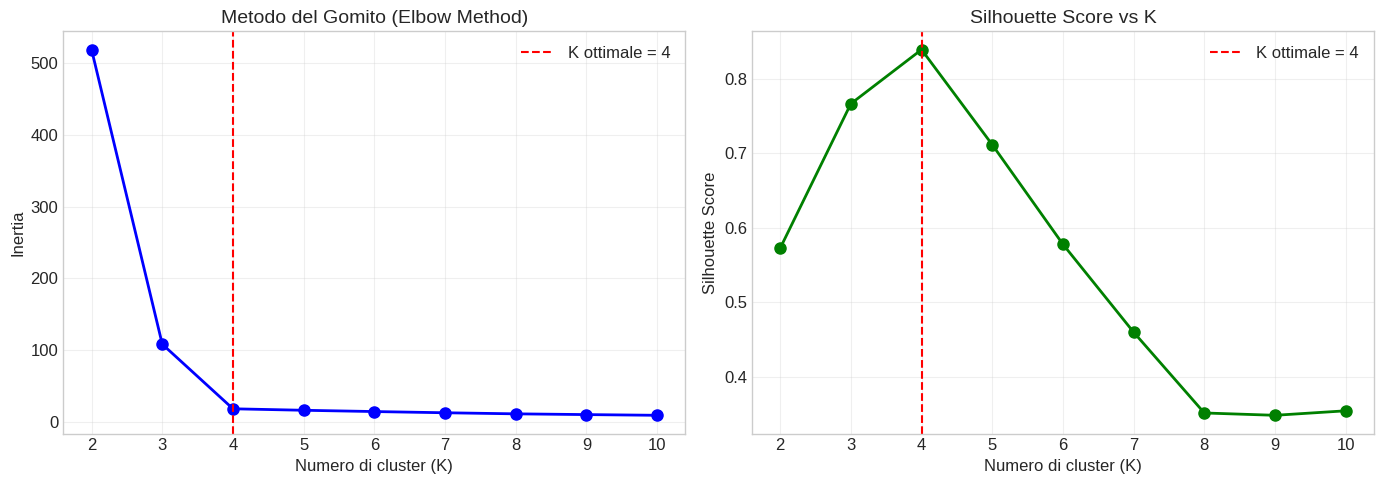

Osservazione: il gomito si trova a K=4, confermato anche dal picco del Silhouette Score.


In [4]:
# Elbow Method per determinare K ottimale
# Sezione incapsulata

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Generazione dati
X_elbow, _ = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=0.8, random_state=42)
scaler_elbow = StandardScaler()
X_elbow_scaled = scaler_elbow.fit_transform(X_elbow)

# Calcolo metriche per diversi valori di K
k_range = range(2, 11)
inertias = []
silhouettes = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_elbow_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_elbow_scaled, kmeans.labels_))

# Visualizzazione
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].axvline(x=4, color='red', linestyle='--', label='K ottimale = 4')
axes[0].set_xlabel('Numero di cluster (K)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Metodo del Gomito (Elbow Method)', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Silhouette plot
axes[1].plot(k_range, silhouettes, 'go-', linewidth=2, markersize=8)
axes[1].axvline(x=4, color='red', linestyle='--', label='K ottimale = 4')
axes[1].set_xlabel('Numero di cluster (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score vs K', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Osservazione: il gomito si trova a K=4, confermato anche dal picco del Silhouette Score.")

**Osservazioni importanti su K-Means**

- Usare sempre `k-means++` per l'inizializzazione (default in sklearn)
- Standardizzare sempre i dati prima di applicare K-Means
- K-Means assume cluster sferici e di dimensioni simili
- Per cluster di forme arbitrarie, considerare DBSCAN

**Quando usare K-Means**

- Dataset grandi (scalabilita lineare)
- Cluster ben separati e di forma sferica
- Quando si conosce approssimativamente il numero di cluster
- Come baseline per confronto con altri algoritmi